In [42]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = np.array([[1,2],[9, 0],[0, 12]])
print(a)

[[ 1  2]
 [ 9  0]
 [ 0 12]]


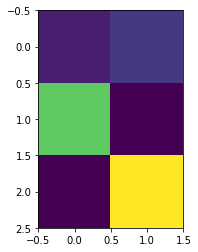

In [3]:
plt.imshow(a, interpolation='nearest')

In [43]:
class neuralNetwork:
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningGrate):
        self.inodes = inputNodes
        self.hnodes = hiddenNodes
        self.onodes = outputNodes

        self.lr = learningGrate

        # wij代表i结点到下一层的j结点的权重

        # 简单初始化权重
        # self.wih = np.random.rand(self.hnodes, self.inodes) - 0.5
        # self.who = np.random.rand(self.onodes, self.hnodes) - 0.5

        # 复杂的初始化权重，使用均值为0，方差为"1/传入链接数"的正态分布采样
        # 传入链接数应该是前一层的结点数，第二个参数书上是本层结点数，我改成上一层结点数
        self.wih = np.random.normal(0.0, self.inodes ** -0.5, (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, self.hnodes ** -0.5, (self.onodes, self.hnodes))

        self.activation_function = scipy.special.expit

    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)

        # 调整隐藏层和输出层之间的权重
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), hidden_outputs.T)
        # 调整输入层与隐藏层时间的权重
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), inputs.T)

    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

In [5]:
# 神经网络实例测试
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

learning_grate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_grate)
print(n.query([1.0, 0.5, -1.5]))

[[0.47317769]
 [0.44027767]
 [0.44286594]]


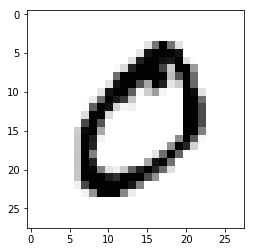

In [41]:
# 单行数据示例展示
with open(r'mnist/mnist_train_100.csv', 'r') as file:
    data_list = file.readlines()
all_values = data_list[1].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array, cmap='Greys')

In [35]:
# 整理输入数据
scaled_input = np.asfarray(all_values[1:]) / 255 * 0.99 +0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [40]:
# 输出数据格式样例
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


In [47]:
# 神经网络实例训练识别手写数字
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_grate = 0.2

# 实例化训练器
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_grate)
# 读入训练数据
with open('mnist/mnist_train.csv', 'r') as training_data_file:
    training_data_list = training_data_file.readlines()
# 训练
from time import perf_counter as pc
start = pc()
for _ in range(1):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

print(pc() - start)


# 测试识别结果
with open('mnist/mnist_test.csv', 'r') as test_data_file:
    test_data_list = test_data_file.readlines()
# 逐行测试
result = []
score = 0
start = pc()
for record in test_data_list:
    label = int(record[0])
    all_values = record[1:].split(',')
    res = n.query(np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01)
    answer = res.argmax()
    # result.append((label, answer))
    if label == answer:
        score += 1

print(pc() - start)
# print(result)
print(score / 10000)

26.586952596955644
2.105918116628864
0.9485
